# Stack Overflow Annual Developer Surveys 2015 to 2019 Analysis 
***
### Business Understanding 
This is stack overflow annual developer surveys analysis. With nearly 90,000 responses fielded from over 170 countries and dependent territories, our 2019 Annual Developer Survey examines all aspects of the developer experience from career satisfaction and job search to education and opinions on open source software.

This project tries to answer the following questions using the the [Stack Overflow Annual Developer Survey dataset](https://insights.stackoverflow.com/survey).

A few questions this project seeks to understand are: 
1. What is the most popular programming language in the past five years?
2. What is the most popular IDE for professional software developers in the past five years?  
3. How much does professional software developers make in the past five years? What is the salary increase rate?
4. Education degree and job satisfaction and salary/compension based on education level for 2019?

Answers to the first 3 questions can be found through the [visualization created in Tableau](https://public.tableau.com/profile/anand.topu#!/vizhome/stackoverflow_ide_popularity/Sheet2
https://public.tableau.com/profile/anand.topu#!/vizhome/stackoverflow_most_popular_programming_languages/Sheet1) and 
[blog post on Medium](https://medium.com/@anand.goud.2020/stack-overflow-survey-analysis-db1c40602919).

***
## PART 1: Data Understanding
There are files in the dataset:  2015,2016,2017,2018,2019 files

2015 survey dataset has 26086 records and 222 columns
2016 survey dataset has 56030 records and 66 columns
2017 survey dataset has 51392 records and 154 columns
2018 survey dataset has 98855 records and 129 columns
2019 survey dataset has 88883 records and 85 columns

In [1]:
!pip install pycountry
!pip install pycountry_convert
!pip install jupytab

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry_convert as pc
from collections import Counter
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

pd.set_option('max_columns', None) # set pandas to display all columns

# Loading data into data frames

In [3]:
# reading source data from csv files
df_2015_survey = pd.read_csv('C:\\Users\\anand\\Downloads\\Stack-Overflow-survey-analysis-master\\data\\2015.csv', header=1)
df_2016_survey = pd.read_csv('C:\\Users\\anand\\Downloads\\Stack-Overflow-survey-analysis-master\\data\\2016.csv')
df_2017_survey = pd.read_csv('C:\\Users\\anand\\Downloads\\Stack-Overflow-survey-analysis-master\\data\\2017.csv')
df_2018_survey = pd.read_csv('C:\\Users\\anand\\Downloads\\Stack-Overflow-survey-analysis-master\\data\\2018.csv')
df_2019_survey = pd.read_csv('C:\\Users\\anand\\Downloads\\Stack-Overflow-survey-analysis-master\\data\\2019.csv')

In [4]:
print("2015 survey dataset has %2d records and %2d columns" %(df_2015_survey.shape[0],df_2015_survey.shape[1]))
print("2016 survey dataset has %2d records and %2d columns" %(df_2016_survey.shape[0],df_2016_survey.shape[1]))
print("2017 survey dataset has %2d records and %2d columns" %(df_2017_survey.shape[0],df_2017_survey.shape[1]))
print("2018 survey dataset has %2d records and %2d columns" %(df_2018_survey.shape[0],df_2018_survey.shape[1]))
print("2019 survey dataset has %2d records and %2d columns" %(df_2019_survey.shape[0],df_2019_survey.shape[1]))

2015 survey dataset has 26086 records and 222 columns
2016 survey dataset has 56030 records and 66 columns
2017 survey dataset has 51392 records and 154 columns
2018 survey dataset has 98855 records and 129 columns
2019 survey dataset has 88883 records and 85 columns


#### a. Inspect survey datasets from 2015, 2016, 2017, 2018, 2019

In [5]:
df_2015_survey.describe()

,Country,Age,Gender,Tabs or Spaces,Years IT / Programming Experience,Occupation,Desktop Operating System,Desktop Operating System: write-in,Current Lang & Tech: Android,Current Lang & Tech: Arduino,Current Lang & Tech: AngularJS,Current Lang & Tech: C,Current Lang & Tech: C++,Current Lang & Tech: C++11,Current Lang & Tech: C#,Current Lang & Tech: Cassandra,Current Lang & Tech: CoffeeScript,Current Lang & Tech: Cordova,Current Lang & Tech: Clojure,Current Lang & Tech: Cloud,Current Lang & Tech: Dart,Current Lang & Tech: F#,Current Lang & Tech: Go,Current Lang & Tech: Hadoop,Current Lang & Tech: Haskell,Current Lang & Tech: iOS,Current Lang & Tech: Java,Current Lang & Tech: JavaScript,Current Lang & Tech: LAMP,Current Lang & Tech: Matlab,Current Lang & Tech: MongoDB,Current Lang & Tech: Node.js,Current Lang & Tech: Objective-C,Current Lang & Tech: Perl,Current Lang & Tech: PHP,Current Lang & Tech: Python,Current Lang & Tech: R,Current Lang & Tech: Redis,Current Lang & Tech: Ruby,Current Lang & Tech: Rust,Current Lang & Tech: Salesforce,Current Lang & Tech: Scala,Current Lang & Tech: Sharepoint,Current Lang & Tech: Spark,Current Lang & Tech: SQL,Current Lang & Tech: SQL Server,Current Lang & Tech: Swift,Current Lang & Tech: Visual Basic,Current Lang & Tech: Windows Phone,Current Lang & Tech: Wordpress,Current Lang & Tech: Write-In,Future Lang & Tech: Android,Future Lang & Tech: Arduino,Future Lang & Tech: AngularJS,Future Lang & Tech: C,Future Lang & Tech: C++,Future Lang & Tech: C++11,Future Lang & Tech: C#,Future Lang & Tech: Cassandra,Future Lang & Tech: CoffeeScript,Future Lang & Tech: Cordova,Future Lang & Tech: Clojure,Future Lang & Tech: Cloud,Future Lang & Tech: Dart,Future Lang & Tech: F#,Future Lang & Tech: Go,Future Lang & Tech: Hadoop,Future Lang & Tech: Haskell,Future Lang & Tech: iOS,Future Lang & Tech: Java,Future Lang & Tech: JavaScript,Future Lang & Tech: LAMP,Future Lang & Tech: Matlab,Future Lang & Tech: MongoDB,Future Lang & Tech: Node.js,Future Lang & Tech: Objective-C,Future Lang & Tech: Perl,Future Lang & Tech: PHP,Future Lang & Tech: Python,Future Lang & Tech: R,Future Lang & Tech: Redis,Future Lang & Tech: Ruby,Future Lang & Tech: Rust,Future Lang & Tech: Salesforce,Future Lang & Tech: Scala,Future Lang & Tech: Sharepoint,Future Lang & Tech: Spark,Future Lang & Tech: SQL,Future Lang & Tech: SQL Server,Future Lang & Tech: Swift,Future Lang & Tech: Visual Basic,Future Lang & Tech: Windows Phone,Future Lang & Tech: Wordpress,Future Lang & Tech: Write-In,Training & Education: No formal training,Training & Education: On the job,Training & Education: Boot camp or night school,Training & Education: Online Class,Training & Education: Mentorship,Training & Education: Industry certification,"Training & Education: Some college, but no CS degree",Training & Education: BS in CS,Training & Education: Masters in CS,Training & Education: PhD in CS,Training & Education: Other,Compensation,Compensation: midpoint,Employment Status,Industry,Job Satisfaction,Purchasing Power,Remote Status,Changed Jobs in last 12 Months,Open to new job opportunities,Most important aspect of new job opportunity: Salary,Most important aspect of new job opportunity: Equity,Most important aspect of new job opportunity: Important decisions,Most important aspect of new job opportunity: Health insurance,Most important aspect of new job opportunity: Industry,Most important aspect of new job opportunity: Tech stack,Most important aspect of new job opportunity: Company size,Most important aspect of new job opportunity: Company stage,Most important aspect of new job opportunity: Work - Life balance,Most important aspect of new job opportunity: Advancement,Most important aspect of new job opportunity: Job title,Most important aspect of new job opportunity: Office location,Most important aspect of new job opportunity: Quality of colleagues,Most important aspect of new job opportunity: Company culture,Most important aspect of new job opportunity: Company re

In [6]:
df_2016_survey.keys()

Index(['Unnamed: 0', 'collector', 'country', 'un_subregion', 'so_region',
       'age_range', 'age_midpoint', 'gender', 'self_identification',
       'occupation', 'occupation_group', 'experience_range',
       'experience_midpoint', 'salary_range', 'salary_midpoint',
       'big_mac_index', 'tech_do', 'tech_want', 'aliens',
       'programming_ability', 'employment_status', 'industry',
       'company_size_range', 'team_size_range', 'women_on_team', 'remote',
       'job_satisfaction', 'job_discovery', 'dev_environment',
       'commit_frequency', 'hobby', 'dogs_vs_cats', 'desktop_os',
       'unit_testing', 'rep_range', 'visit_frequency', 'why_learn_new_tech',
       'education', 'open_to_new_job', 'new_job_value', 'job_search_annoyance',
       'interview_likelihood', 'how_to_improve_interview_process',
       'star_wars_vs_star_trek', 'agree_tech', 'agree_notice',
       'agree_problemsolving', 'agree_diversity', 'agree_adblocker',
       'agree_alcohol', 'agree_loveboss', 'agree_n

In [7]:
df_2015_survey.keys()

Index(['Country', 'Age', 'Gender', 'Tabs or Spaces',
       'Years IT / Programming Experience', 'Occupation',
       'Desktop Operating System', 'Desktop Operating System: write-in',
       'Current Lang & Tech: Android', 'Current Lang & Tech: Arduino',
       ...
       'Why use Stack Overflow: I don't use Stack Overflow',
       'How often are Stack Overflow's answers helpful',
       'Why answer: Help a programmer in need',
       'Why answer: Help future programmers',
       'Why answer: Demonstrate expertise', 'Why answer: Self promotion',
       'Why answer: Sense of responsibility to developers',
       'Why answer: No idea', 'Why answer: I don't answer and I don't want to',
       'Why answer: I don't answer but I want to'],
      dtype='object', length=222)

In [8]:
df_2017_survey.keys()

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [9]:
df_2018_survey.keys()

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Exercise', 'Gender', 'SexualOrientation', 'EducationParents',
       'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong',
       'SurveyEasy'],
      dtype='object', length=129)

In [10]:
df_2019_survey.keys()

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [11]:
df_2016_survey.describe()

,Unnamed: 0,age_midpoint,experience_midpoint,salary_midpoint,big_mac_index,programming_ability
count,56030.000000,55336.000000,49520.000000,41742.000000,48825.000000,46982.000000
mean,28014.500000,29.621286,6.640145,53952.973025,3.907442,7.094547
std,16174.612128,9.108102,4.446157,46518.823875,1.120232,1.766312
min,0.000000,16.000000,0.500000,5000.000000,1.530000,1.000000
25%,14007.250000,22.000000,3.500000,15000.000000,3.410000,6.000000
50%,28014.500000,27.000000,3.500000,45000.000000,4.220000,7.000000
75%,42021.750000,32.000000,13.000000,75000.000000,4.930000,8.000000
max,56029.000000,65.000000,13.000000,210000.000000,6.440000,10.000000


In [12]:
df_2017_survey.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [13]:
df_2018_survey.describe()

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64917.000000,48706.000000,48706.000000,48706.000000,48706.000000,48706.000000,46213.000000,46213.000000,46213.000000,46213.000000,46213.000000,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,6.057804,1.884177,6.080609,4.450553,7.563218,7.068101,5.765581,6.948196,5.615053,7.920746,6.865061,5.838625,3.035396,1.560588,3.849998,3.005112,3.548906,3.709541,4.224309,3.796572,3.015602,3.443338,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,2.663405,1.880973,3.080841,2.808365,2.830099,2.638513,2.851319,2.746491,2.782918,2.765758,2.687617,2.706479,1.326079,0.906463,1.315095,1.160622,1.116461,2.071172,1.842500,2.082178,1.651321,1.983163,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,4.000000,1.000000,3.000000,2.000000,5.000000,5.000000,3.000000,5.000000,3.000000,6.000000,5.000000,4.000000,2.000000,1.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,6.000000,1.000000,6.000000,4.000000,8.000000,7.000000,5.000000,7.000000,5.000000,9.000000,7.000000,6.000000,3.000000,1.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,8.000000,2.000000,9.000000,6.000000,10.000000,9.000000,8.000000,9.000000,8.000000,10.000000,9.000000,8.000000,4.000000,2.000000,5.000000,4.000000,4.000000,6.000000,6.000000,6.000000,4.000000,5.000000,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [14]:
df_2019_survey.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [15]:
df_2016_survey.isnull().mean().sort_values()

Unnamed: 0                          0.000000
collector                           0.000000
age_range                           0.005408
gender                              0.007924
country                             0.008959
so_region                           0.011422
age_midpoint                        0.012386
un_subregion                        0.012797
self_identification                 0.032625
employment_status                   0.115188
experience_range                    0.116188
experience_midpoint                 0.116188
occupation                          0.116206
aliens                              0.122309
tech_do                             0.125022
big_mac_index                       0.128592
tech_want                           0.144173
programming_ability                 0.161485
occupation_group                    0.162342
hobby                               0.167000
unit_testing                        0.167285
commit_frequency                    0.168338
desktop_os

In [16]:
df_2015_survey.isnull().sum()

Country                                                        807
Age                                                            255
Gender                                                         342
Tabs or Spaces                                                 279
Years IT / Programming Experience                             1259
Occupation                                                    5235
Desktop Operating System                                      4106
Desktop Operating System: write-in                           25296
Current Lang & Tech: Android                                 21976
Current Lang & Tech: Arduino                                 24460
Current Lang & Tech: AngularJS                               23173
Current Lang & Tech: C                                       22474
Current Lang & Tech: C++                                     21557
Current Lang & Tech: C++11                                   24235
Current Lang & Tech: C#                                      1

In [17]:
df_2016_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56030 entries, 0 to 56029
Data columns (total 66 columns):
Unnamed: 0                          56030 non-null int64
collector                           56030 non-null object
country                             55528 non-null object
un_subregion                        55313 non-null object
so_region                           55390 non-null object
age_range                           55727 non-null object
age_midpoint                        55336 non-null float64
gender                              55586 non-null object
self_identification                 54202 non-null object
occupation                          49519 non-null object
occupation_group                    46934 non-null object
experience_range                    49520 non-null object
experience_midpoint                 49520 non-null float64
salary_range                        46121 non-null object
salary_midpoint                     41742 non-null float64
big_mac_index      

In [18]:
df_2019_survey.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [19]:
list(df_2018_survey.columns)

['Respondent',
 'Hobby',
 'OpenSource',
 'Country',
 'Student',
 'Employment',
 'FormalEducation',
 'UndergradMajor',
 'CompanySize',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'JobSatisfaction',
 'CareerSatisfaction',
 'HopeFiveYears',
 'JobSearchStatus',
 'LastNewJob',
 'AssessJob1',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'AssessJob10',
 'AssessBenefits1',
 'AssessBenefits2',
 'AssessBenefits3',
 'AssessBenefits4',
 'AssessBenefits5',
 'AssessBenefits6',
 'AssessBenefits7',
 'AssessBenefits8',
 'AssessBenefits9',
 'AssessBenefits10',
 'AssessBenefits11',
 'JobContactPriorities1',
 'JobContactPriorities2',
 'JobContactPriorities3',
 'JobContactPriorities4',
 'JobContactPriorities5',
 'JobEmailPriorities1',
 'JobEmailPriorities2',
 'JobEmailPriorities3',
 'JobEmailPriorities4',
 'JobEmailPriorities5',
 'JobEmailPriorities6',
 'JobEmailPriorities7',
 'UpdateCV',
 'Currency',
 'Salary',
 'SalaryType',

#### b. Inspect survey datasets from 2019 for job, compensation with respective education level

In [20]:
df_edu_sal = df_2019_survey[["Employment", "EdLevel", "UndergradMajor", "EduOther", "OrgSize", "DevType", "YearsCode", "YearsCodePro", "Age1stCode", "CareerSat", "JobSat", "CompTotal", 'ConvertedComp']]
df_edu_sal = df_edu_sal[df_edu_sal["ConvertedComp"]==df_edu_sal["CompTotal"]]
df_edu_sal.describe()

,CompTotal,ConvertedComp
count,1.337000e+04,1.337000e+04
mean,1.193621e+05,1.193621e+05
std,8.109625e+04,8.109625e+04
min,0.000000e+00,0.000000e+00
25%,7.800000e+04,7.800000e+04
50%,1.050000e+05,1.050000e+05
75%,1.410000e+05,1.410000e+05
max,2.000000e+06,2.000000e+06


In [21]:
# Next drop rows where the total compensation is null and drop the duplicate column ConvertedComp
df_edu_sal.dropna(subset=["CompTotal"], inplace=True)
df_edu_sal.drop(columns = ["ConvertedComp"], inplace=True)
df_edu_sal.isnull().sum()

Employment         18
EdLevel            75
UndergradMajor    694
EduOther          197
OrgSize           269
DevType           203
YearsCode          21
YearsCodePro       46
Age1stCode         32
CareerSat           0
JobSat              7
CompTotal           0
dtype: int64

In [22]:
df_edu_sal.groupby("EdLevel").mean().reset_index()

,EdLevel,CompTotal
0,Associate degree,96384.821033
1,"Bachelor’s degree (BA, BS, B.Eng., etc.)",115808.983816
2,I never completed any formal education,121559.125000
3,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",134820.450245
4,"Other doctoral degree (Ph.D, Ed.D., etc.)",155079.931116
5,Primary/elementary school,105901.358974
6,"Professional degree (JD, MD, etc.)",106707.142857
7,"Secondary school (e.g. American high school, G...",108169.561798
8,Some college/university study without earning ...,115089.453265


### 2. Data Preparation


##### Step 1: Clean target variable and check correlation between continuous variables
**Data Preparation** <br>
Data cleaning is necessary for further analysis. <br> 
The salary difference between countries are so big. It doesn't make sense to calculate the average salary of professional software developers for the whole world. Since we have data from more than 170 countries and dependent territories, it also does not make sense to calculate the average salary for every country. So I added a column named 'continent', and calculated the average salary based on different continents.<br>
**Missing Values** <br>
Because we have a very large dataset and only a small fraction of data has no salary information, so I removed the rows where salary information are missing.<br>

In [23]:
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}
def country2continent(country):
    '''
    Convert country name to continent name
    e.g. input 'USA'  ouput 'North America'
    '''
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = continents[continent_code]
    except:
        continent_name = 'not find'
    return continent_name

In [24]:
def compensation2int(compensation):
    '''
    Data type convertion from 'object' to 'float'
    '''
    try:
        res = float(compensation)
    except:
        res = np.nan
    return res

In [25]:
#Converted the YearsCodePro to Number
def to_num(df_edu_sal, col):
    df_edu_sal.dropna(subset=[col], inplace=True)
    df_edu_sal = df_edu_sal.replace('Less than 1 year', '0')
    df_edu_sal[col] = pd.to_numeric(df_edu_sal[col], errors='coerce')
    return df_edu_sal

df_edu_sal = to_num(df_edu_sal, 'YearsCodePro')
df_edu_sal = to_num(df_edu_sal, 'YearsCode')

# For those who are currently employed, does their income compare wih education level
HighSchool = df_edu_sal[df_edu_sal.EdLevel.isin(['Some college/university study without earning a degree', 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'])]
PostHighSchool = df_edu_sal[df_edu_sal["EdLevel"].isin(['Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)', 'Other doctoral degree (Ph.D, Ed.D., etc.)',
        'Professional degree (JD, MD, etc.)'])]
HighSchool.head(5)

PostHighSchool.YearsCodePro.unique()


array([ 0.,  8.,  1., 14., 23., 35., 20.,  6.,  2., 10., 48.,  4., 11.,
       12.,  9.,  5., 22.,  3.,  7., 17., 15., 16., 30., 37., 13., 18.,
       19., 28., 27., 25., 39., 33., 34., 24., 21., 38., 29., 44., 36.,
       43., 26., 32., 41., 42., 31., 45., 40., 47., 49., nan, 50.])

### 2.1 Clean data for year 2015

In [26]:
# create a new column 'continent' based on 'Country'
df_2015_survey['continent'] = df_2015_survey['Country'].apply(country2continent)
# Convert the datatype of Compensation from object to float
df_2015_survey['Compensation: midpoint']=df_2015_survey['Compensation: midpoint'].apply(compensation2int)
# delete rows if Compensation column is np.nan/missing
# Because we have a very large dataset and only a small fraction of data has no salary 
# information, so I removed the rows where salary information are missing.
df_2015_remove_nan = df_2015_survey.dropna(subset=['Compensation: midpoint'],axis = 0)

### 2.2 Clean data for year 2016

In [27]:
# create a new column 'continent' based on 'Country'
df_2016_survey['continent'] = df_2016_survey['country'].apply(country2continent)
# delete rows if salary column is np.nan
# Because we have a very large dataset and only a small fraction of data has no salary 
# information, so I removed the rows where salary information are missing.
df_2016_remove_nan = df_2016_survey.dropna(subset=['salary_midpoint'],axis = 0)

### 2.3 Clean data for year 2017

In [28]:
# create a new column 'continent' based on 'Country'
df_2017_survey['continent'] = df_2017_survey['Country'].apply(country2continent)
# delete rows if salary column is np.nan
# Because we have a very large dataset and only a small fraction of data has no salary 
# information, so I removed the rows where salary information are missing.
df_2017_remove_nan = df_2017_survey.dropna(subset=['Salary'],axis = 0)

### 2.4 Clean data for year 2018

In [29]:
# create a new column 'continent' based on 'Country'
df_2018_survey['continent'] = df_2018_survey['Country'].apply(country2continent)
# delete rows if salary column is np.nan
# Because we have a very large dataset and only a small fraction of data has no salary 
# information, so I removed the rows where salary information are missing.
df_2018_remove_nan = df_2018_survey.dropna(subset=['ConvertedSalary'], axis=0)

### 2.5 Clean data for year 2019

In [30]:
# create a new column 'continent' based on 'Country'
df_2019_survey['continent'] = df_2019_survey['Country'].apply(country2continent)
# delete rows if salary column is np.nan
# Because we have a very large dataset and only a small fraction of data has no salary 
# information, so I removed the rows where salary information are missing.
df_2019_remove_nan = df_2019_survey.dropna(subset=['ConvertedComp'], axis=0)

# 3. Analyze and model

### 3.1 Average salary calculation
** Incorrect values** <br>
When I examining the dataset in the data assessment step, I saw some full time developer have salary of 0, while others have salary of 10^30 dollars! These are obviously not true. So I decided to only include salaries within 0.1 - 0.9 quantile for the average salary calucation. I believe this is reasonable.

**3.1.1 Year 2015**

In [31]:
# only considering full time developers
temp = df_2015_remove_nan[df_2015_remove_nan['Employment Status']=='Employed full-time']
# get the 0.1 and 0.9 quantile of salary
low = temp['Compensation: midpoint'].quantile(0.1)
high = temp['Compensation: midpoint'].quantile(0.9)
# only use the salary that is within the range between 0.1 and 0.9 quantile
temp = temp[temp['Compensation: midpoint']>=low]
temp = temp[temp['Compensation: midpoint']<=high]
df_salary_2015 = temp.groupby(['continent']).mean()['Compensation: midpoint']

**3.1.2 Year 2016**

In [32]:
# only considering full time developers
temp = df_2016_remove_nan[df_2016_remove_nan['employment_status']=='Employed full-time']
# get the 0.1 and 0.9 quantile of salary
low = temp['salary_midpoint'].quantile(0.1)
high = temp['salary_midpoint'].quantile(0.9)
# only use the salary that is within the range between 0.1 and 0.9 quantile
temp = temp[temp['salary_midpoint']>=low]
temp = temp[temp['salary_midpoint']<=high]
df_salary_2016 = temp.groupby(['continent']).mean()['salary_midpoint']

**3.1.3 Year 2017**

In [33]:
# only considering full time developers
temp = df_2017_remove_nan[df_2017_remove_nan['EmploymentStatus']=='Employed full-time']
# get the 0.1 and 0.9 quantile of salary
low = temp['Salary'].quantile(0.1)
high = temp['Salary'].quantile(0.9)
temp = temp[temp['Salary']>=low]
temp = temp[temp['Salary']<=high]
# only use the salary that is within the range between 0.1 and 0.9 quantile
df_salary_2017 = temp.groupby(['continent']).mean()['Salary']

**3.1.4 Year 2018**

In [53]:
# only considering full time developers
temp = df_2018_remove_nan[df_2018_remove_nan['Employment']=='Employed full-time']
# get the 0.1 and 0.9 quantile of salary
low = temp['ConvertedSalary'].quantile(0.1)
high = temp['ConvertedSalary'].quantile(0.9)
# only use the salary that is within the range between 0.1 and 0.9 quantile
temp = temp[temp['ConvertedSalary']>=low]
temp = temp[temp['ConvertedSalary']<=high]
df_salary_2018 = temp.groupby(['continent']).mean()['ConvertedSalary']

**3.1.5 Year 2019**

In [54]:
temp = df_2019_remove_nan[df_2019_remove_nan['Employment']=='Employed full-time']
low = temp['ConvertedComp'].quantile(0.1)
high = temp['ConvertedComp'].quantile(0.9)
print(low, high)
temp = temp[temp['ConvertedComp']>=low]
temp = temp[temp['ConvertedComp']<=high]
df_salary_2019 = temp.groupby(['continent']).mean()['ConvertedComp']

10914.0 180000.0


### 3.2 Analysing most popular programming languages

**3.2.1 Year 2015**

In [36]:
# get the columns related to the programming languages
column = [x for x in df_2015_survey.columns if x.startswith('Current Lang & Tech')]
df_2015_survey[column].isnull().mean().sort_values()[0:10]

Current Lang & Tech: JavaScript    0.541440
Current Lang & Tech: SQL           0.638158
Current Lang & Tech: Java          0.684927
Current Lang & Tech: C#            0.733612
Current Lang & Tech: PHP           0.749712
Current Lang & Tech: Python        0.799203
Current Lang & Tech: C++           0.826382
Current Lang & Tech: SQL Server    0.841716
Current Lang & Tech: Android       0.842444
Current Lang & Tech: C             0.861535
dtype: float64

**4.2.2 Year 2016**

In [37]:
all_languages = []
for x in list(df_2016_survey['tech_do'].dropna()):
    items = x.split(';')
    for item in items:
        all_languages.append(item.strip())
all_languages_count =Counter(all_languages)
all_languages_count.most_common(10)

[('JavaScript', 27385),
 ('SQL', 21976),
 ('Java', 17942),
 ('C#', 15283),
 ('PHP', 12780),
 ('Python', 12282),
 ('C++', 9589),
 ('SQL Server', 9306),
 ('AngularJS', 8823),
 ('Android', 8601)]

**3.2.3 Year 2017**

In [38]:
all_languages = []
for x in list(df_2017_survey['HaveWorkedLanguage'].dropna()):
    items = x.split(';')
    for item in items:
        all_languages.append(item.strip())
all_languages_count =Counter(all_languages)
all_languages_count.most_common(10)

[('JavaScript', 22875),
 ('SQL', 18754),
 ('Java', 14524),
 ('C#', 12476),
 ('Python', 11704),
 ('PHP', 10290),
 ('C++', 8155),
 ('C', 6974),
 ('TypeScript', 3488),
 ('Ruby', 3324)]

**3.2.4 Year 2018**

In [39]:
all_languages = []
for x in list(df_2018_survey['LanguageWorkedWith'].dropna()):
    items = x.split(';')
    for item in items:
        all_languages.append(item.strip())
all_languages_count =Counter(all_languages)
all_languages_count.most_common(10)

[('JavaScript', 54686),
 ('HTML', 53628),
 ('CSS', 50979),
 ('SQL', 44670),
 ('Java', 35521),
 ('Bash/Shell', 31172),
 ('Python', 30359),
 ('C#', 26954),
 ('PHP', 24071),
 ('C++', 19872)]

**4.2.5 Year 2019**

In [40]:
all_languages = []
for x in list(df_2019_survey['LanguageWorkedWith'].dropna()):
    items = x.split(';')
    for item in items:
        all_languages.append(item.strip())
all_languages_count =Counter(all_languages)
all_languages_count.most_common(10)

[('JavaScript', 59219),
 ('HTML/CSS', 55466),
 ('SQL', 47544),
 ('Python', 36443),
 ('Java', 35917),
 ('Bash/Shell/PowerShell', 31991),
 ('C#', 27097),
 ('PHP', 23030),
 ('C++', 20524),
 ('TypeScript', 18523)]

### 3.3 Most popular IDEs

**IDE survey data available only for 2016, 2017, 2018, 2019. 

**3.3.1 Year 2016**

In [41]:
all_editor = []
for x in list(df_2016_survey['dev_environment'].dropna()):
    items = x.split(';')
    for item in items:
        all_editor.append(item.strip())
all_editor_count =Counter(all_editor)
all_editor_count.most_common(10)

[('Notepad++', 16607),
 ('Visual Studio', 16580),
 ('Sublime', 14434),
 ('Vim', 12180),
 ('Eclipse', 10564),
 ('IntelliJ', 7938),
 ('Android Studio', 6073),
 ('Atom', 5825),
 ('Xcode', 4822),
 ('NetBeans', 3773)]

**3.3.2 Year 2017**

In [42]:
all_editor = []
for x in list(df_2017_survey['IDE'].dropna()):
    items = x.split(';')
    for item in items:
        all_editor.append(item.strip())
all_editor_count =Counter(all_editor)
all_editor_count.most_common(10)

[('Visual Studio', 13677),
 ('Notepad++', 12681),
 ('Sublime Text', 9978),
 ('Vim', 9679),
 ('Eclipse', 7899),
 ('IntelliJ', 7418),
 ('Visual Studio Code', 6826),
 ('Atom', 6540),
 ('Android Studio', 5953),
 ('Xcode', 3850)]

**3.3.3 Year 2018**

In [43]:
all_editor = []
for x in list(df_2018_survey['IDE'].dropna()):
    items = x.split(';')
    for item in items:
        all_editor.append(item.strip())
all_editor_count =Counter(all_editor)
all_editor_count.most_common(10)

[('Visual Studio Code', 26280),
 ('Visual Studio', 25870),
 ('Notepad++', 25755),
 ('Sublime Text', 21810),
 ('Vim', 19477),
 ('IntelliJ', 18765),
 ('Android Studio', 14558),
 ('Eclipse', 14213),
 ('Atom', 13576),
 ('PyCharm', 9027)]

**3.3.4 Year 2019**

In [44]:
all_editor = []
for x in list(df_2019_survey['DevEnviron'].dropna()):
    items = x.split(';')
    for item in items:
        all_editor.append(item.strip())
all_editor_count =Counter(all_editor)
all_editor_count.most_common(10)

[('Visual Studio Code', 44311),
 ('Visual Studio', 27490),
 ('Notepad++', 26621),
 ('IntelliJ', 22166),
 ('Vim', 22163),
 ('Sublime Text', 20424),
 ('Android Studio', 14787),
 ('Eclipse', 12591),
 ('PyCharm', 11724),
 ('Atom', 11636)]

# 4. Visualize

### 4.1 Figure 1. The most popular programming languages

In [45]:
%%HTML
<div class='tableauPlaceholder' id='viz1587238728659' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;st&#47;stackoverflow_most_popular_programming_languages&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='stackoverflow_most_popular_programming_languages&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;st&#47;stackoverflow_most_popular_programming_languages&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1587238728659');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### 4.2 Figure 2. The most popular IDEs

This figure is generated using Tableau with the results from Part 4.2

In [46]:
%%HTML
<div class='tableauPlaceholder' id='viz1587235848849' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;st&#47;stackoverflow_ide_popularity&#47;Sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='stackoverflow_ide_popularity&#47;Sheet2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;st&#47;stackoverflow_ide_popularity&#47;Sheet2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1587235848849');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### 4.3 Figure 3. Average salary of full time professional developers

In [47]:
df_salary_2015.name = '2015'
df_salary_2016.name = '2016'
df_salary_2017.name = '2017'
df_salary_2018.name = '2018'
df_salary_2019.name = '2019'

In [48]:
df_salary = pd.DataFrame([df_salary_2015,df_salary_2016,df_salary_2017,df_salary_2018,df_salary_2019])
df_salary = df_salary/1000

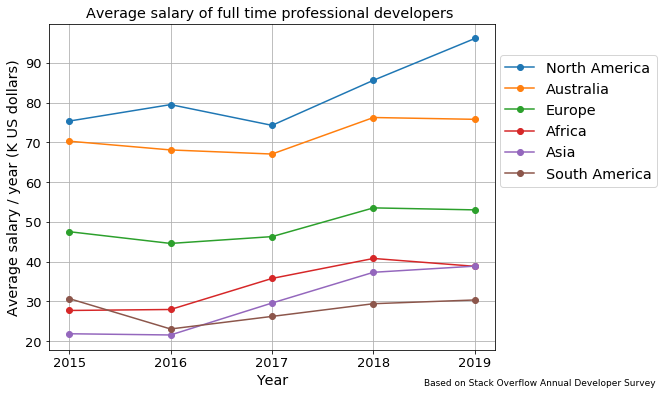

In [49]:
plt.figure(figsize=(8,6))
plt.title('Average salary of full time professional developers ',fontsize='x-large')
plt.xlabel("Year",fontsize='x-large')
plt.ylabel("Average salary / year (K US dollars)",fontsize='x-large')
plt.plot(df_salary['North America'],'-o',label='North America')
plt.plot(df_salary['Australia'],'-o',label='Australia')
plt.plot(df_salary['Europe'],'-o',label='Europe')
plt.plot(df_salary['Africa'],'-o',label='Africa')
plt.plot(df_salary['Asia'],'-o',label='Asia')
plt.plot(df_salary['South America'],'-o',label='South America')
plt.grid('on')
plt.tick_params(labelsize=13)
lg=plt.legend(loc=[1.01, 0.5],fontsize='x-large')
plt.text(3.5,9,'Based on Stack Overflow Annual Developer Survey',fontsize=9)
plt.savefig('salary_increase.png',dpi=300, bbox_extra_artists=(lg,),bbox_inches='tight')
plt.show()

### 5.4 Figure 4. The salary increase rate starting from Year 2015 in percent %

It is also interesting to know the salary increase rate, So I calcualted the cumulative salary increase rate using Year 2015 as the baseline.

In [50]:
# get the salary increase percentage using Year 2015 as the baseline
df_salary_percentage=(df_salary/df_salary.iloc[0,:]-1)*100

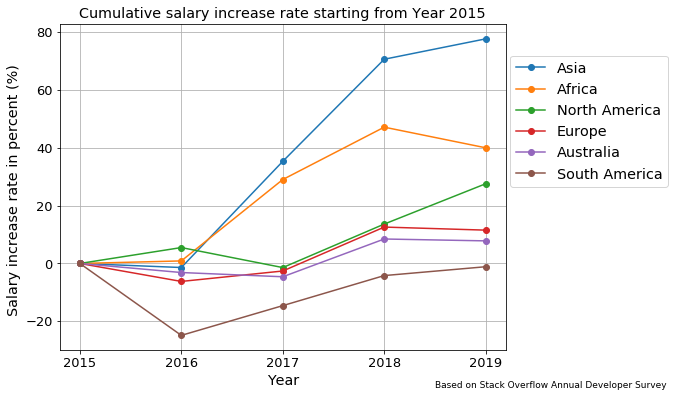

In [51]:
plt.figure(figsize=(8,6))
plt.title('Cumulative salary increase rate starting from Year 2015',fontsize='x-large')
plt.xlabel("Year",fontsize='x-large')
plt.ylabel("Salary increase rate in percent (%) ",fontsize='x-large')
plt.plot(df_salary_percentage['Asia'],'-o',label='Asia')
plt.plot(df_salary_percentage['Africa'],'-o',label='Africa')
plt.plot(df_salary_percentage['North America'],'-o',label='North America')
plt.plot(df_salary_percentage['Europe'],'-o',label='Europe')
plt.plot(df_salary_percentage['Australia'],'-o',label='Australia')
plt.plot(df_salary_percentage['South America'],'-o',label='South America')
plt.grid('on')
plt.tick_params(labelsize=13)
plt.text(3.5,-43,'Based on Stack Overflow Annual Developer Survey',fontsize=9)
lg=plt.legend(loc=[1.01, 0.5], fontsize='x-large')
plt.savefig('salary_increase_percentage.png',dpi=300, bbox_extra_artists=(lg,),bbox_inches='tight')
plt.show()

### 5.5 Figure 4. The salary performance with respective to education level and years of experience

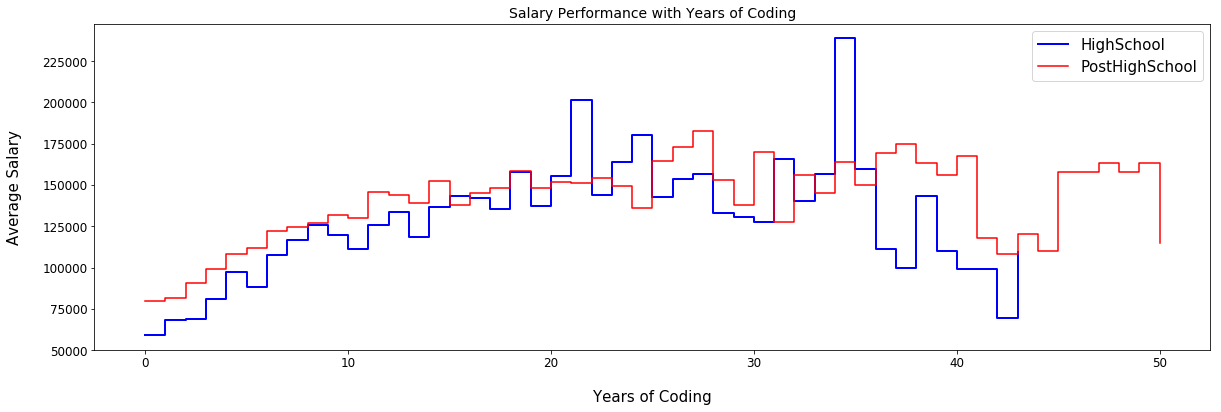

In [52]:
g1 = HighSchool.groupby("YearsCodePro").mean().reset_index()
g2 = PostHighSchool.groupby("YearsCodePro").mean().reset_index()

fig, ax = plt.subplots(1, 1, figsize=(20, 6))
g1.plot(drawstyle="steps-post", x="YearsCodePro", y="CompTotal", linewidth=2, color='b', ax =ax, label='HighSchool');
g2.plot(drawstyle="steps-post", x="YearsCodePro", y="CompTotal", ax=ax, color='r', label='PostHighSchool');
plt.legend(fontsize=15)

ax.set_ylabel('Average Salary', size=15, labelpad=20)
ax.set_xlabel('Years of Coding', size=15, labelpad=20)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_title('Salary Performance with Years of Coding', fontsize=14);

## Conclusion
Based on the data analysis of stack overflow surveys from 2015 to 2019, we can come up with observations as below:

1.The most popular programming languages are JavaScript, HTML/CSS and SQL. 

2.The most popular IDEs are Visual Studio, Notepad++ and sublime. 

3.North American developers have the highest average salary and relatively high salary increase rate. 

4.Professionals with advanced degrees are clearly earning more than those with only High School degree with the same years of Coding Experience However, as the years of experience increase, the difference becomes smaller.
